In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


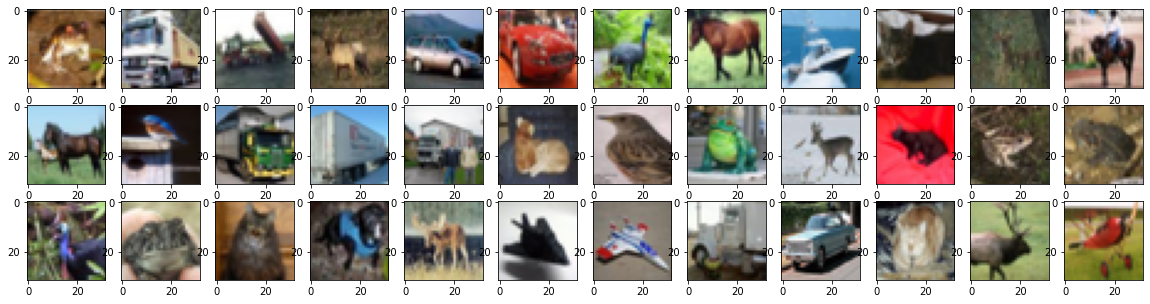

In [ ]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1)
    ax.imshow(np.squeeze(x_train[i]))

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

NameError: ignored

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
model1 = Sequential()
model1.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", input_shape=(32, 32, 3)))
model1.add(LeakyReLU(0.1))
model1.add(Conv2D(filters=16, kernel_size=3,padding="same"))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=32, kernel_size=(3,3),padding="same"))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=64, kernel_size=(3,3),padding="same"))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=128, kernel_size=(3,3), padding="same"))
model1.add(LeakyReLU(0.1))
model1.add(MaxPooling2D(pool_size=2))


model1.add(Flatten())
model1.add(Dense(500, activation='relu'))
model1.add(Dense(50, activation='relu'))
model1.add(LeakyReLU(0.1))
model1.add(Dropout(0.4))
model1.add(Dense(10, activation='softmax'))

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                        

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
history4 = model1.fit(x_train, y_train, batch_size=100, epochs=15,
          validation_data=(x_valid, y_valid), 
          verbose=2, shuffle=True)

Epoch 1/15
450/450 - 4s - loss: 0.7768 - accuracy: 0.7439 - val_loss: 0.8256 - val_accuracy: 0.7254 - 4s/epoch - 9ms/step
Epoch 2/15
450/450 - 3s - loss: 0.7242 - accuracy: 0.7617 - val_loss: 1.0051 - val_accuracy: 0.7120 - 3s/epoch - 7ms/step
Epoch 3/15
450/450 - 3s - loss: 0.6876 - accuracy: 0.7726 - val_loss: 0.8589 - val_accuracy: 0.7316 - 3s/epoch - 7ms/step
Epoch 4/15
450/450 - 3s - loss: 0.6577 - accuracy: 0.7837 - val_loss: 0.8719 - val_accuracy: 0.7390 - 3s/epoch - 7ms/step
Epoch 5/15
450/450 - 3s - loss: 0.6421 - accuracy: 0.7912 - val_loss: 0.9624 - val_accuracy: 0.7398 - 3s/epoch - 8ms/step
Epoch 6/15
450/450 - 3s - loss: 0.6141 - accuracy: 0.7970 - val_loss: 0.9390 - val_accuracy: 0.7346 - 3s/epoch - 8ms/step
Epoch 7/15
450/450 - 3s - loss: 0.6081 - accuracy: 0.8005 - val_loss: 0.9189 - val_accuracy: 0.7376 - 3s/epoch - 8ms/step
Epoch 8/15
450/450 - 3s - loss: 0.5940 - accuracy: 0.8039 - val_loss: 1.1779 - val_accuracy: 0.7024 - 3s/epoch - 7ms/step
Epoch 9/15
450/450 - 3s 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
history4.params

{'epochs': 15, 'steps': 450, 'verbose': 2}

In [ ]:
pd.DataFrame(history4.history)

,loss,accuracy,val_loss,val_accuracy
0,0.776780,0.743911,0.825619,0.7254
1,0.724168,0.761667,1.005055,0.7120
2,0.687599,0.772578,0.858949,0.7316
3,0.657728,0.783711,0.871871,0.7390
4,0.642076,0.791222,0.962413,0.7398
5,0.614119,0.797000,0.938977,0.7346
6,0.608144,0.800511,0.918891,0.7376
7,0.594012,0.803889,1.177945,0.7024
8,0.588210,0.809333,1.034131,0.7376
9,0.579690,0.810889,0.927973,0.7324


<function matplotlib.pyplot.show>

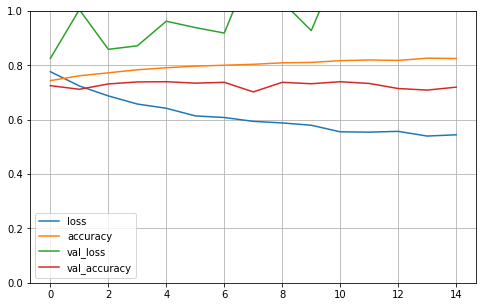

In [ ]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show

In [ ]:
score = model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6261 - accuracy: 0.7164


In [ ]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

accuracy1 = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy1)

Test Loss: 1.6260921955108643
Test accuracy: 0.7164000272750854
Test accuracy: 71.6400%


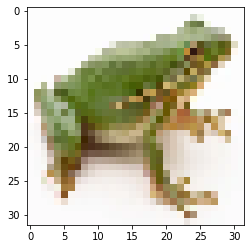

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
deer


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
from tensorflow.keras. preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
dir_path = "/content/drive/MyDrive/dataset/frog.webp"
img= image.load_img(dir_path, target_size =(32,32,3))
plt.imshow(img)
plt.show()
    
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = np.vstack([x])
    
val = model1.predict(images)
print(val)
for i in range (10):
  if val[0][i] == 1:
    x = i
    print(classes[i])